# 1.1 랜덤 포레스트 공부하기

#### (1)Random Forest 란?
- 여러개의 의사결정나무를 만들어서 결과를 투표하거나 평균 내서 예측하는 앙상블 모델

#### (2) 왜 'Random' 인가?
- Bootstrap 샘플링 : 학습 데이터를 중복 허용하며 랜덤하게 뽑아 각각의 나무가 다른 데이터로 학습하도록 함
- Feature Randomness : 나무를 분할할 때 전체 변수 중 일부만 랜덤하게 선택  =>과접합을 방지할 수 있다.

#### (3) Random Forest 의 구조
- Bagging + 랜덤 변수 선택

#### (4) Random Forest 의 장점
- 이상치에 강함
- 과대적합 방지


# 1.2 데이터 구성 살펴보기
<독립 변수>
- Pregnancies : 임신 횟수
- Glucose : 2시간동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압
- Skin Thickness : 삼두근 피부 주름 두께
- Insulin: 2시간 혈청 인슐린
- BMI: 체질량 지수
- DiabetesPedigreeFuction : 당뇨병 혈통 기능
- Age: 나이

<종속 변수>
- Outcome : 결과

# 2. 필요한 라이브러리 로드

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 3. 데이터셋 로드

In [110]:
df = pd.read_csv(r"C:\Users\yms10\OneDrive\바탕 화면\diabetes.csv")

# 4. 데이터 살펴보기

In [111]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [112]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [113]:
df.shape

(768, 9)

In [114]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [115]:
df.describe()

#Insulin의 경우 mean과 max의 차이가 크게 난다=> 이상치일 가능성 높음
# 수치형 자료 중 min값이 0인 경우, 가짜 결측치일 확률이 높다. 'Glucose','BloodPressure' ,'SkinThickness','Insulin','BMI'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [116]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [117]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Text(0.5, 1.0, 'correlation heatmap')

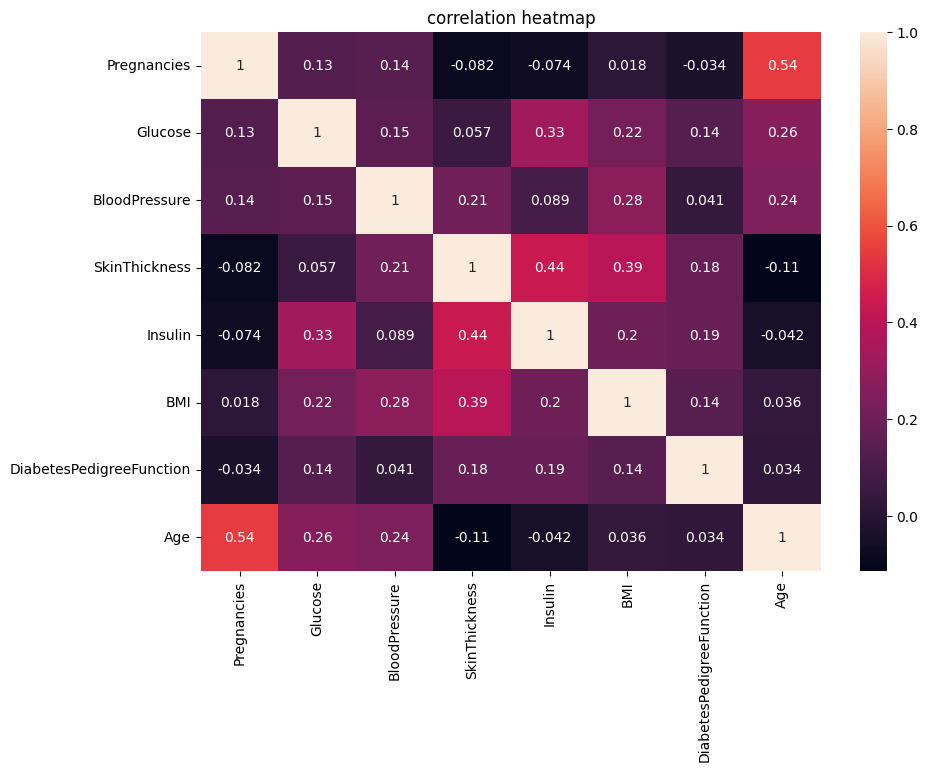

In [118]:
plt.figure(figsize=(10,7))  #사이즈 조정
sns.heatmap(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].corr(),annot=True)
plt.title('correlation heatmap') #상관계수 행렬 히트맵

#Age와 Pregnancise, Insulin과 SkinThickness 상관계수가 높은 편

# 5. 결측치 처리하기

In [119]:
df.isnull().sum()
#공식적인 결측치는 없으나, 이상치나 가짜 결측치가 존재할 수 있다.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 5.1 가짜 결측치 존재 확인하기
- Glucose 정상범위 : 70~200
- BloodPressure 정상 범위: 40~200
- BMI 정상 범위: 10~70
- Insulin, SkinThickness: 현실적으로 0일 가능성 희박

In [120]:
# 각 column 별 0 갯수 파악하기
zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for a in zero:
    print(a, "에서 0인 값의 갯수: ", (df[a] == 0).sum())

Glucose 에서 0인 값의 갯수:  5
BloodPressure 에서 0인 값의 갯수:  35
SkinThickness 에서 0인 값의 갯수:  227
Insulin 에서 0인 값의 갯수:  374
BMI 에서 0인 값의 갯수:  11


<Axes: >

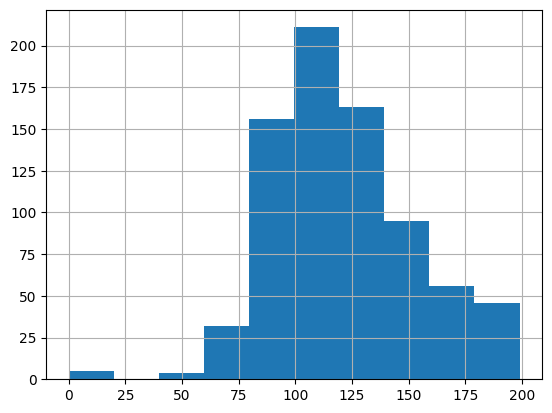

In [121]:
df['Glucose'].hist()

<Axes: >

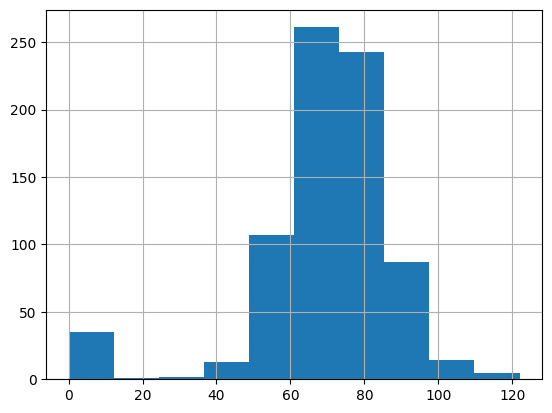

In [122]:
df['BloodPressure'].hist()

<Axes: >

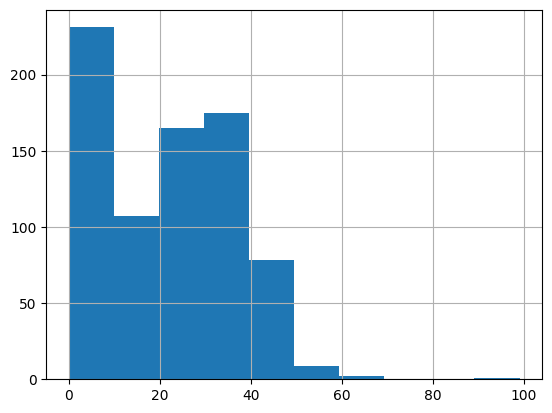

In [123]:
df['SkinThickness'].hist()

<Axes: >

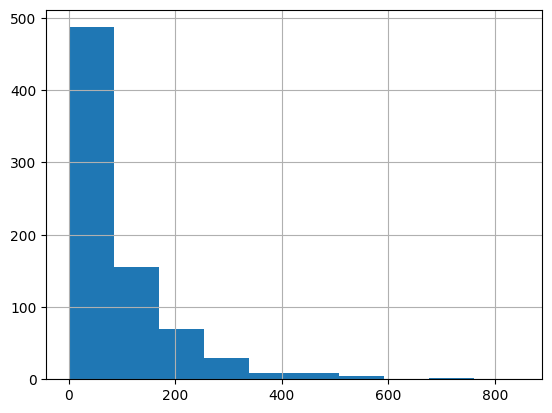

In [124]:
df['Insulin'].hist()

<Axes: >

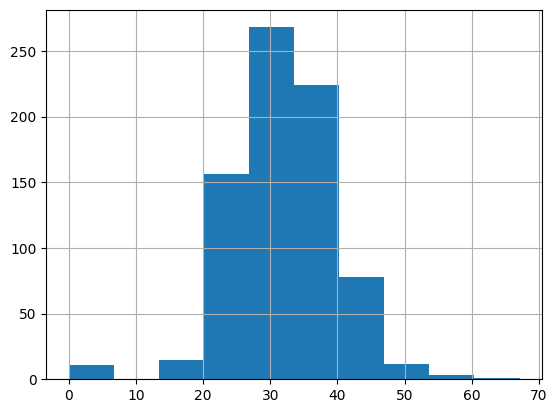

In [125]:
df['BMI'].hist()

## 5.2 가짜 결측치 처리하기
  Glucose, BloodPressure, BMI, SkinThickness, Insulin :

 이상치가 존재하므로 평균은 왜곡 가능성이 높음  
 0인 값을 중앙값으로 대체한다.

In [126]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols] = df[zero_cols].replace(0 , np.nan) #0인 값을 NAN(결측치)으로 바꾼다.
df.fillna(df.median(), inplace = True) #NAN을 median 으로 바꾼다

In [127]:
# 결측치 다 채워졌나 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [128]:
#값 분포 다시 확인
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


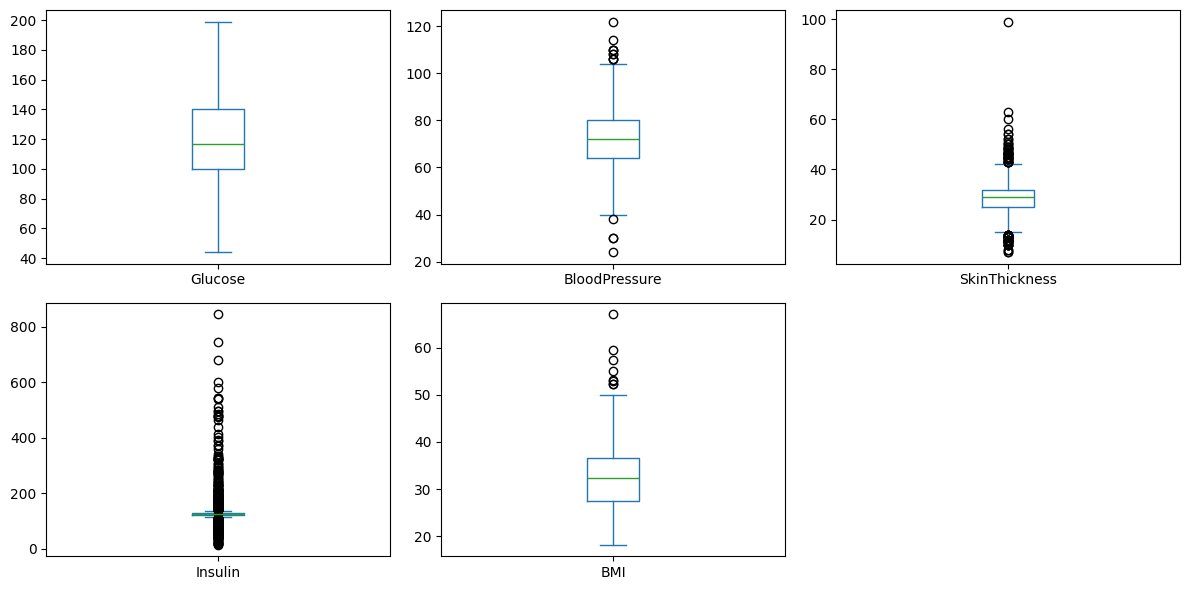

In [129]:
#이상치 확인을 위해 boxplot 그리기
df[zero_cols].plot.box(subplots = True , layout = (2,3), figsize = (12,6))
plt.tight_layout()
plt.show()
#이상치가 보이긴 하지만 Random Forest 모델은 이상치에 강하므로 굳이 제거하지 않고 넘어가겠다.

# 6.1 Random Forest 학습하기

In [130]:
# 1. 데이터 분리
X = df.drop('Outcome', axis = 1) #Outcome을 제외한 나머지열은 X에 담는다
Y = df['Outcome'] #타깃 변수

In [131]:
# Train, Test 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2 , #전체 데이터 중 20%가 테스트용
                                                    random_state= 42 , #랜덤 시드 고정 => 실행할 때마다 똑같이!
                                                    stratify= Y) #Y 비율 유지해서 분할

In [132]:
# Random Forest 학습하기
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators = 100, #트리 갯수 제한 X
    max_depth = None, # 깊이 제한 X
    random_state = 42
)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

## 6.2 Random Forest 예측 & 평가

In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Y_pred = model.predict(X_test) #테스트 데이터를 넣어 만든 예측값

print(" Accuracy:", accuracy_score(Y_test, Y_pred)) #진짜 정답과 모델이 예측한 값 비교하여 전체에서 모델이 맞춘 비율
# 정확도 : 0.78
print("\n Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\n Classification Report:\n", classification_report(Y_test, Y_pred))

 Accuracy: 0.7792207792207793

 Confusion Matrix:
 [[88 12]
 [22 32]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



## 6.3 예측에 중요한 변수 시각화

In [134]:
importances = model.feature_importances_ #각 변수의 중요도 반환
importances


array([0.08079504, 0.27408602, 0.08351849, 0.07046848, 0.09122369,
       0.16190324, 0.12502045, 0.1129846 ])

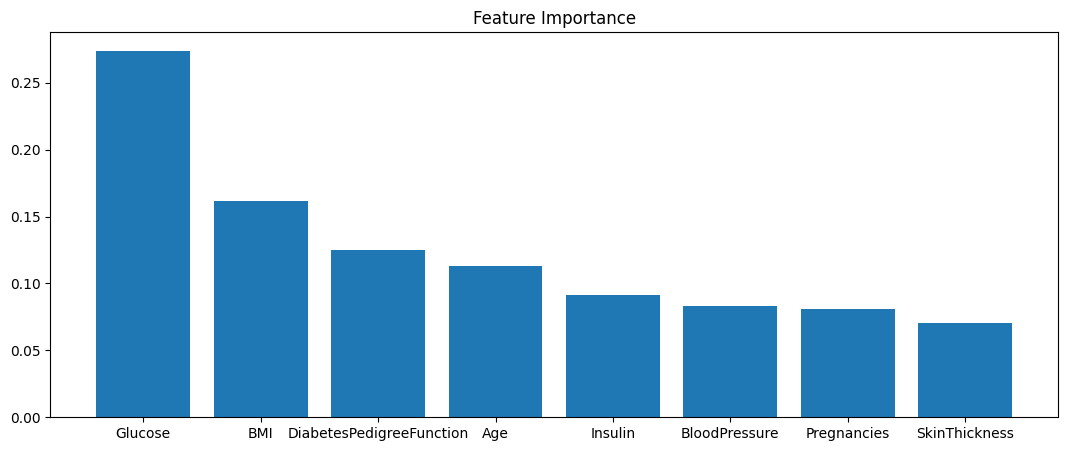

In [135]:
import_sort = np.argsort(importances)[::-1] #중요도 순으로 정렬

plt.figure(figsize = (13,5))
plt.bar(range(X.shape[1]), importances[import_sort])
 #막대 그래프로 변수 중요도 그리기
#변수 갯수만큼 X축 , 중요도 순으로 Y축
plt.xticks(range(len(importances)), X.columns[import_sort])
plt.title("Feature Importance")
plt.show()

## 6.4 Random Forest 학습 결과
- 정확도 : 0.77  
- 중요한 변수: Glucose > BMI > Age  
=> 혈중 포도당 농도와 체지방 지수가 당뇨병에 가장 큰 영향을 준다

# 과제 2 회귀분석 예습
- 분류와 회귀의 차이점  
- -분류: 타깃 변수가 범주형
- -회귀: 타깃 변수가 연속형

## 1.1 라이브러리 불러오기

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 데이터셋 로드

In [137]:
data = pd.read_csv(r"C:\Users\yms10\OneDrive\바탕 화면\diabetes.csv")

## 1.3 데이터 미리보기

In [138]:
data.shape

(768, 9)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [140]:
data.head() #Insulin이 0인 부분을 회귀로 예측한 값으로 채울 예정!

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2.1 학습, 예측 데이터셋 나누기

In [141]:
#label 값을 기준으로 나눈다.
#나누기 전에 label 값을 시각화 한다.
(data['Insulin'] > 0).value_counts()
#0보다 큰 값: 394개
#0보다 작은 값: 374개

Insulin
True     394
False    374
Name: count, dtype: int64

In [142]:
# 학습 데이터: Insulin이 0보다 큰 data를 train 변수에 넣어준다.
train = data[data["Insulin"] > 0].copy()
train.shape

(394, 9)

In [143]:
# 테스트 데이터: Insulin이 0인 데이터를 test변수에 넣어준다.
test = data[data["Insulin"] == 0].copy()
test.shape

(374, 9)

### 2.1.1 EDA


<Axes: ylabel='Insulin'>

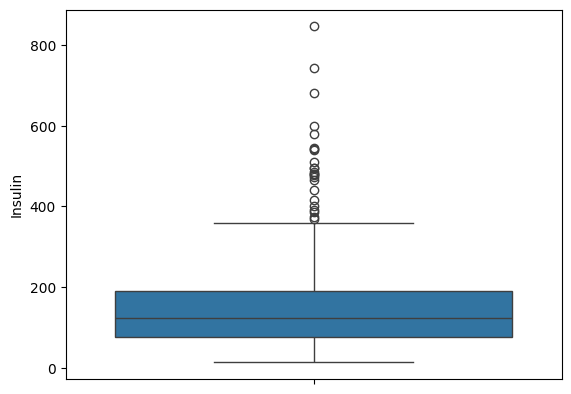

In [144]:
sns.boxplot(train['Insulin'])

In [145]:
desc = train['Insulin'].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [146]:
#out lier 구하기  IQR : 3IQR - 1IQR
# OUT > 3IQR + (IQR * 1.5)
IQR = desc.loc['75%'] - desc.loc['25%']
OUT = desc.loc['75%'] + (IQR * 1.5)

In [147]:
train[train['Insulin'] > OUT].shape

(24, 9)

In [148]:
train = train[train['Insulin'] < OUT] #OUT 이하로 예측
train.shape

(370, 9)

## 2.2 학습, 예측에 사용할 칼럼

In [149]:
# feature_names 라는 변수에 학습과 예측에 사용할 칼럼명을 리스트 형태로 가져온다.
feature_names = test.columns.tolist()
feature_names.remove('Insulin') #Insulin은 맞춰야 하는 값이므로 제거한다.
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## 2.3 정답값이자 예측해야 될 값

In [150]:
#label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.
label_name = "Insulin"
label_name

'Insulin'

## 2.4 학습, 예측 데이터셋 만들기

In [151]:
# 학습 세트 만들기
x_train = train[feature_names]
x_train.shape

(370, 8)

In [152]:
# 정답값 만들기
y_train = train[label_name]
y_train.shape

(370,)

In [153]:
#예측에 사용할 데이터셋 만들기
x_test = test[feature_names]
x_test.shape

(374, 8)

In [154]:
#예측의 정답값
y_test = test[label_name]
y_test.shape

(374,)

## 3. 머신 러닝 알고리즘 가져오기

In [155]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor


estimators = [DecisionTreeRegressor(random_state= 42),
              RandomForestRegressor(random_state = 42),
              GradientBoostingRegressor(random_state = 42)]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [156]:
results = []

for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)

pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [157]:
from sklearn.model_selection import RandomizedSearchCV

results = []

for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)


    max_depth = list(np.random.randint(5, 30, 10))
    max_features = list(np.round(np.random.uniform(0.3, 1.0, 10),2))

    param_distributions = {"max_depth" : max_depth, "max_features" : max_features}

    regressor = RandomizedSearchCV(estimator, param_distributions, n_iter = 10, scoring = None, n_jobs = None, cv= 5 , verbose = 2, random_state = 42)

    regressor.fit(x_train, y_train)

    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................max_depth=27, max_features=0.3; total time=   0.0s
[CV] END .....................max_depth=27, max_features=0.3; total time=   0.0s
[CV] END .....................max_depth=27, max_features=0.3; total time=   0.0s
[CV] END .....................max_depth=27, max_features=0.3; total time=   0.0s
[CV] END .....................max_depth=27, max_features=0.3; total time=   0.0s
[CV] END .....................max_depth=29, max_features=0.3; total time=   0.0s
[CV] END .....................max_depth=29, max_features=0.3; total time=   0.0s
[CV] END .....................max_depth=29, max_features=0.3; total time=   0.0s
[CV] END .....................max_depth=29, max_features=0.3; total time=   0.0s
[CV] END .....................max_depth=29, max_features=0.3; total time=   0.0s
[CV] END .....................max_depth=23, max_features=0.8; total time=   0.0s
[CV] END .....................max_depth=23, max_

In [175]:
df_cv = pd.DataFrame(results)
df_cv.columns = ['model', 'model', 'params', 'estimator', 'score', 'cv_result']
df_cv

,model,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,DecisionTreeRegressor,"{'max_features': 0.83, 'max_depth': 10}","DecisionTreeRegressor(max_depth=np.int32(10), ...",-0.071503,"{'mean_fit_time': [0.0031641483306884765, 0.00..."
1,RandomForestRegressor,RandomForestRegressor,"{'max_features': 0.57, 'max_depth': 5}","(DecisionTreeRegressor(max_depth=np.int32(5), ...",0.349482,"{'mean_fit_time': [0.1262967586517334, 0.14995..."
2,GradientBoostingRegressor,GradientBoostingRegressor,"{'max_features': 0.48, 'max_depth': 24}",([DecisionTreeRegressor(criterion='friedman_ms...,0.291189,"{'mean_fit_time': [0.23008694648742675, 0.2468..."


In [176]:
best_estimator = df_cv.loc[1, 'estimator']
best_estimator

RandomForestRegressor(max_depth=np.int32(5), max_features=np.float64(0.57),
                      random_state=42)

## 4.1 학습

In [159]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

## 4.2 cross validation으로 학습 세트의 오차 측정하기

In [177]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, x_train, y_train, cv = 5 , verbose = 2 , n_jobs = -1) #cv가 높을수록 정확도가 올라감
y_pred[:5]

c:\Users\yms10\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   11.4s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.4s finished


array([ 37, 194,  18, 168, 220])

In [161]:
(y_pred == y_train).sum()
#정답을 맞춘 갯수는 3개밖에 읎땅 =>5개로 늘어남!

np.int64(8)

<Axes: xlabel='Insulin'>

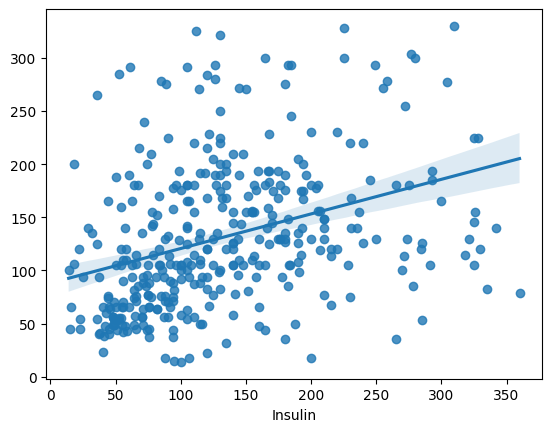

In [162]:
#결과값 시각화
sns.regplot(x = y_train, y = y_pred)

In [163]:
# r2_score : 회귀선의 값 구하기
from sklearn.metrics import r2_score

r2_score(y_train, y_pred)

-0.210604761843024

C:\Users\yms10\AppData\Local\Temp\ipykernel_36908\811340238.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist = False, label = 'Train')
C:\Users\yms10\AppData\Local\Temp\ipykernel_36908\811340238.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,hist = 

<Axes: xlabel='Insulin', ylabel='Density'>

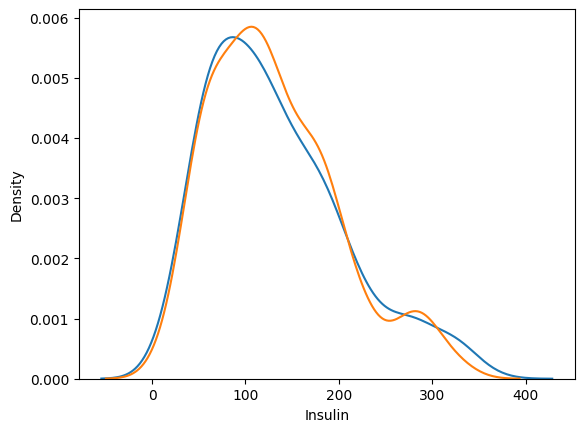

In [164]:
#distplot 으로 정답값과 예측값의 분포 그리기

sns.distplot(y_train, hist = False, label = 'Train')
sns.distplot(y_pred,hist = False, label = 'Predict' )

## 4.3 실제값과 예측값의 오차 구하기

In [165]:
#MAE: 에러값의 평균 오차
abs(y_train - y_pred).mean() #오차값의 절대값의 평균

np.float64(59.14594594594595)

In [166]:
# 오차값의 평균 시각화
error = abs(y_train - y_pred)

C:\Users\yms10\AppData\Local\Temp\ipykernel_36908\1567266927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Insulin', ylabel='Density'>

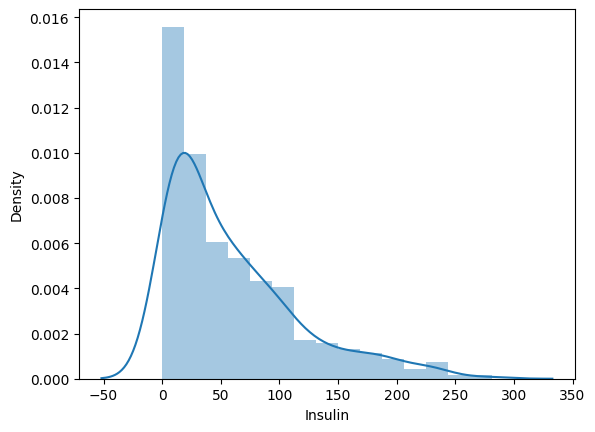

In [167]:
sns.distplot(error)

In [168]:
error.describe()

count    370.000000
mean      59.145946
std       56.327443
min        0.000000
25%       17.000000
50%       42.500000
75%       86.000000
max      281.000000
Name: Insulin, dtype: float64

In [169]:
#RMSE : 에러값에 제곱을 한 후 평균을 구하고 루트를 씌운다. =>표준편차와 비슷
np.sqrt(((y_train - y_pred) ** 2).mean())

np.float64(81.62382402613007)

## 5. 트리 알고리즘 분석하기

<Axes: >

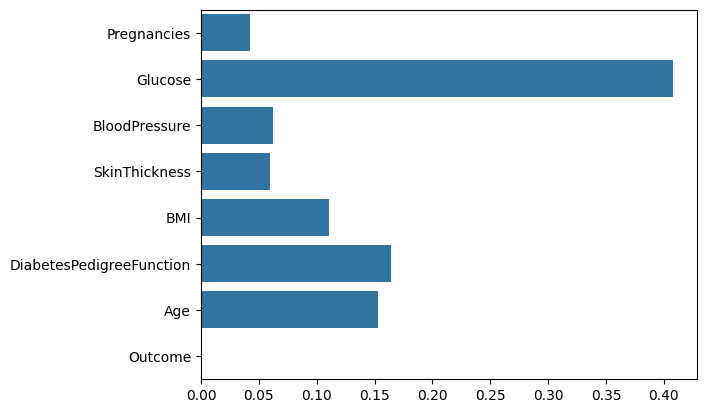

In [ ]:
# 피처의 중요도 시각화
sns.barplot( x = model.feature_importances_, y= feature_names)

## 6. 예측

In [ ]:
y_test = model.predict(x_test)
y_test[:5]

array([168.,  37., 145.,  36., 182.])

In [ ]:
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [ ]:
test['Insulin'] = y_test

In [ ]:
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.161017,102.224032,15.0,64.0,99.5,158.25,600.0
1,138.0,212.434783,141.952236,44.0,115.0,176.0,267.00,846.0


<Axes: xlabel='Outcome', ylabel='Insulin'>

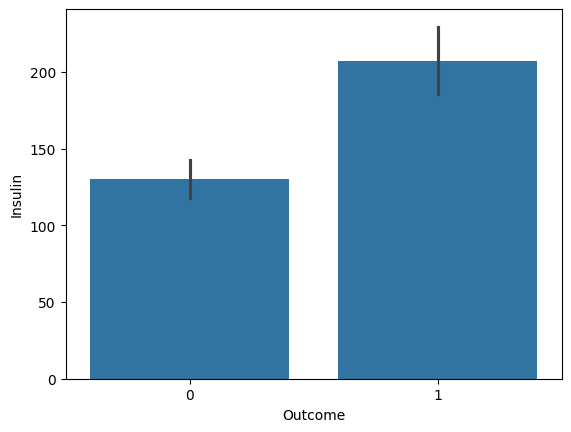

In [ ]:
sns.barplot(data = train, x='Outcome', y='Insulin')

<Axes: xlabel='Outcome', ylabel='Insulin'>

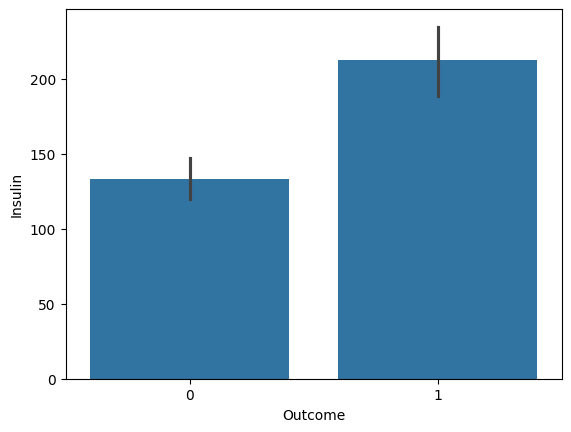

In [ ]:
sns.barplot(data= test, x='Outcome', y='Insulin')